In [9]:
import pandas as pd

In [10]:
df_feature_x = pd.read_csv("preprocess.csv", index_col=0)
df_feature_x.head(10)

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,MentalHealth_No,MentalHealth_Yes,YearsCode,YearsCodePro,ComputerSkills
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7,4,4
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,12,5,12
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,15,6,7
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,9,6,13
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,40,30,2
5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9,2,5
6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,26,18,17
7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,14,5,4
8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,39,21,3
9,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20,16,6


In [11]:
df_feature_y = pd.read_csv("label.csv", index_col=0)
df_feature_y.head(10)

,Employed
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
5,0.0
6,1.0
7,0.0
8,0.0
9,0.0


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(df_feature_x, df_feature_y, test_size=0.1, random_state=1)


print(f"Data before splitting: {len(df_feature_x)}")
print(f"Train data: {len(X_train)}")
print(f"Validation data: {len(X_valid)}")

Data before splitting: 73462
Train data: 66115
Validation data: 7347


In [13]:
EPOCH = 20
LEARNING_RATE = 1e-3

In [14]:
import tensorflow as tf
len_feature = len(df_feature_x.columns)

tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len_feature,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(2, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

history = model.fit(X_train, Y_train, epochs=EPOCH, validation_data=(X_valid, Y_valid))

Epoch 1/20


2067/2067 [==============================] - 17s 8ms/step - loss: 0.4764 - accuracy: 0.7649 - val_loss: 0.4456 - val_accuracy: 0.7832
Epoch 2/20
2067/2067 [==============================] - 16s 8ms/step - loss: 0.4487 - accuracy: 0.7809 - val_loss: 0.4455 - val_accuracy: 0.7851
Epoch 3/20
2067/2067 [==============================] - 16s 8ms/step - loss: 0.4462 - accuracy: 0.7821 - val_loss: 0.4469 - val_accuracy: 0.7772
Epoch 4/20
2067/2067 [==============================] - 17s 8ms/step - loss: 0.4457 - accuracy: 0.7820 - val_loss: 0.4517 - val_accuracy: 0.7787
Epoch 5/20
2067/2067 [==============================] - 19s 9ms/step - loss: 0.4455 - accuracy: 0.7815 - val_loss: 0.4522 - val_accuracy: 0.7803
Epoch 6/20
2067/2067 [==============================] - 17s 8ms/step - loss: 0.4450 - accuracy: 0.7826 - val_loss: 0.4438 - val_accuracy: 0.7871
Epoch 7/20
2067/2067 [==============================] - 17s 8ms/step - loss: 0.4445 - accuracy: 0.7831 - val_loss: 0.4424 - val_accuracy: 0.7

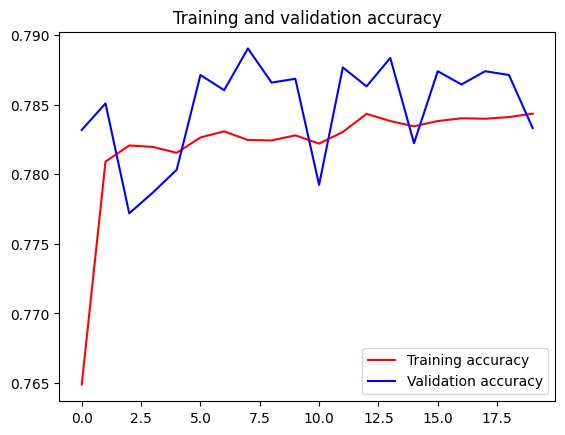

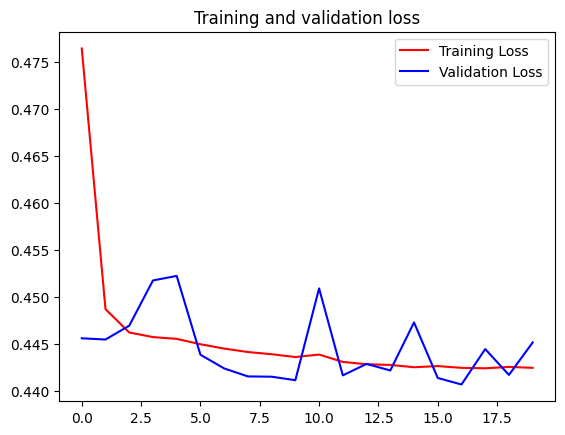

In [15]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
model.predict([[1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.72,-0.84,-0.925234]])

1/1 [==============================] - 0s 76ms/step


array([[9.9998724e-01, 1.2744121e-05]], dtype=float32)